In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [218]:
def getData(path, platform, cols):
    data = pd.read_csv(path, parse_dates=['created_at'])
    for col in data.columns:
        if cols[col]:
            data = data.drop(col, 1)
    data['platform'] = platform
    data = data.sort_values(by='created_at')
    return data

reddit_data = getData('Data\\reddit_labeled.csv', 'reddit', {
    'Unnamed: 0': True,
    'Unnamed: 0.1': True,
    'author': True,
    'body': False,
    'created_utc': True,
    'created': True,
    'created_at': False,
    'sentiment': False
})

twitter_data = getData('Data\\twitter_labeled2.csv', 'twitter', {
    'Unnamed: 0.1': True,
    'Unnamed: 0': True,
    'id': True,
    'conversation_id': True,
    'created_at': False,
    'date': True,
    'time': True,
    'timezone': True,
    'user_id': True,
    'username': True,
    'name': True,
    'place': True,
    'tweet': False,
    'language': True,
    'mentions': True,
    'urls': True,
    'photos': True,
    'replies_count': True,
    'retweets_count': True,
    'likes_count': True,
    'hashtags': True,
    'cashtags': True,
    'link': True,
    'retweet': True,
    'quote_url': True,
    'video': True,
    'thumbnail': True,
    'near': True,
    'geo': True,
    'source': True,
    'user_rt_id': True,
    'user_rt': True,
    'retweet_id': True,
    'reply_to': True,
    'retweet_date': True,
    'translate': True,
    'trans_src': True,
    'trans_dest': True,
    'sentiment': False
})

twitter_data = twitter_data.rename(columns={'tweet': 'body'})

In [219]:
data = pd.concat([twitter_data, reddit_data], ignore_index=True, sort=['created_at'])

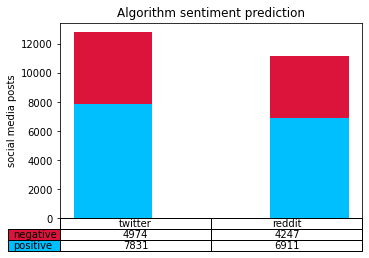

In [220]:
positive_tweets = data[(data.platform == 'twitter') & (data.sentiment == 1)].count()['sentiment']
negative_tweets = data[(data.platform == 'twitter') & (data.sentiment == 0)].count()['sentiment']

positive_posts = data[(data.platform == 'reddit') & (data.sentiment == 1)].count()['sentiment']
negative_posts = data[(data.platform == 'reddit') & (data.sentiment == 0)].count()['sentiment']

columns = ('twitter', 'reddit')
rows = ['negative', 'positive']
colors = ['deepskyblue', 'crimson']

counts = [[positive_tweets, positive_posts], [negative_tweets, negative_posts]]
values = np.arange(0, 30000, 500)
n_rows = len(counts)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, counts[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = counts[row]
    cell_text.append([x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel('social media posts')
plt.xticks([])
plt.title('Algorithm sentiment prediction')

plt.show()


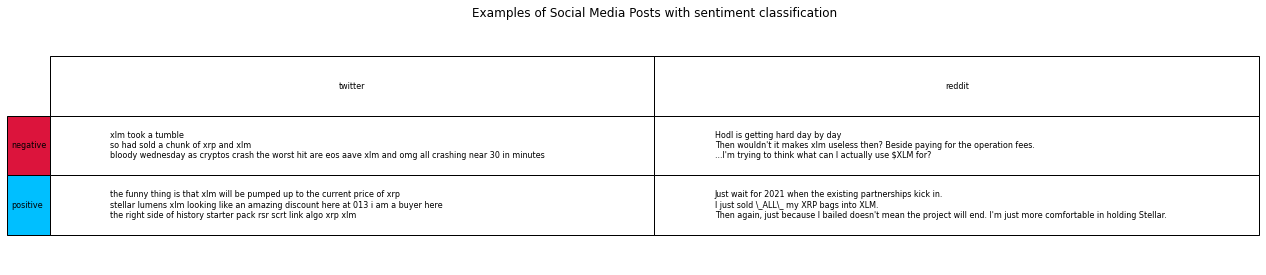

In [250]:
positive_tweets = data[(data.platform == 'twitter') & (data.sentiment == 1)].head(100)
negative_tweets = data[(data.platform == 'twitter') & (data.sentiment == 0)].head(100)
positive_posts = data[(data.platform == 'reddit') & (data.sentiment == 1)].head(100)
negative_posts = data[(data.platform == 'reddit') & (data.sentiment == 0)].head(100)

#handpicked
positive_tweets = 'the funny thing is that xlm will be pumped up to the current price of xrp\nstellar lumens xlm looking like an amazing discount here at 013 i am a buyer here\nthe right side of history starter pack rsr scrt link algo xrp xlm'
negative_tweets = 'xlm took a tumble\nso had sold a chunk of xrp and xlm\nbloody wednesday as cryptos crash the worst hit are eos aave xlm and omg all crashing near 30 in minutes'

positive_posts = 'Just wait for 2021 when the existing partnerships kick in.\nI just sold \_ALL\_ my XRP bags into XLM.\nThen again, just because I bailed doesn\'t mean the project will end. I\'m just more comfortable in holding Stellar.'

negative_posts = 'Hodl is getting hard day by day\nThen wouldn\'t it makes xlm useless then? Beside paying for the operation fees.\n...I\'m trying to think what can I actually use $XLM for?'

plt.figure(figsize=(24, 5))
plt.title('Examples of Social Media Posts with sentiment classification')

table = plt.table(cellText=[[negative_tweets, negative_posts], [positive_tweets, positive_posts]],
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='center', cellLoc='left')
table.scale(1, 5.5)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.xticks([])
plt.yticks([])
plt.box(on=None)
plt.show()